In [42]:
from pyopenms import *
enter = []
seq =""
f=FASTAFile()

f.load("human1.fasta",enter)
for i in enter:
    seq=seq+i.sequence
dig = ProteaseDigestion()
dig.getEnzymeName() 
bsa = AASequence.fromString(seq)
result = []
dig.digest(bsa, result)
for i in result:
   print(i.toString())

MQPILLLLAFLLLPR
ADAGEIIGGHEAKPHSRPYMAYLMIWDQK
SLK
R
CGGFLIR
DDFVLTAAHCWGSSINVTLGAHNIK
EQEPTQQFIPVK
RPIPHPAYNPK
NFSNDIMLLQLER
K
AK
R
TR
AVQPLR
LPSNK
AQVKPGQTCSVAGWGQTAPLGK
HSHTLQEVK
MTVQEDR
K
CESDLR
HYYDSTIELCVGDPEIK
K
TSFK
GDSGGPLVCNK
VAQGIVSYGR
NNGMPPR
ACTK
VSSFVHWIK
K
TMK
R
Y


In [43]:
from pyopenms import *
enter = []
seq =""
f=FASTAFile()
f.load("human1.fasta",enter)
for i in enter :
    seq=seq+i.sequence
dig = ProteaseDigestion()
dig.getEnzymeName()
bsa = AASequence.fromString(seq)
result = []
dig.digest(bsa, result)
peptides = [AASequence.fromString(i.toString()) for i in result]

for peptide in peptides:
    tsg = TheoreticalSpectrumGenerator()
    theo_spectrum = MSSpectrum()
    spec1 = MSSpectrum()

    p = Param()
    p.setValue("add_b_ions", "true")
    p.setValue("add_y_ions", "true")
    p.setValue("add_losses", "true")
    p.setValue("add_metainfo", "true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1, peptide, 1, 1) 
    print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
    for ion, peak in zip(spec1.getStringDataArrays()[0], spec1):
        print(ion.decode(), "is generated at m/z", peak.getMZ())


Spectrum 1 of MQPILLLLAFLLLPR has 82 peaks.
b2-H3N1+ is generated at m/z 112.03930562627102
y1-C1H2N1O1+ is generated at m/z 131.10531384957102
y1-C1H2N2+ is generated at m/z 133.097154849571
y1-H3N1+ is generated at m/z 158.092403817671
y1+ is generated at m/z 175.118952913371
b3-H3N1+ is generated at m/z 209.092069849571
y2-C1H2N1O1+ is generated at m/z 228.15807807287104
y2-C1H2N2+ is generated at m/z 230.14991907287103
y2-H3N1+ is generated at m/z 255.14516804097101
b2+ is generated at m/z 260.106339739071
y2+ is generated at m/z 272.171717136671
b4-H3N1+ is generated at m/z 322.17613420047104
y3-C1H2N1O1+ is generated at m/z 341.24214242377104
y3-C1H2N2+ is generated at m/z 343.233983423771
b3+ is generated at m/z 357.15910396237103
y3-H3N1+ is generated at m/z 368.22923239187105
y3+ is generated at m/z 385.255781487571
b5-H3N1+ is generated at m/z 435.26019855137105
y4-C1H2N1O1+ is generated at m/z 454.32620677467105
y4-C1H2N2+ is generated at m/z 456.318047774671
b4+ is generate

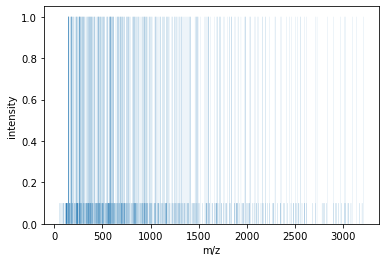

In [44]:
import numpy as np
from matplotlib import pyplot as plt
for r in result:
    peptide = AASequence.fromString(r.toString())
    tsg.getSpectrum(spec1,r,1,1)
plt.bar(spec1.get_peaks()[0], spec1.get_peaks()[1], snap=False) 
plt.xlabel("m/z")
plt.ylabel("intensity")
plt.show()

In [45]:
from pyopenms import *
exp = MSExperiment()
MzMLFile().load("Fusion_180220_40.mzML", exp)
spectra = exp.getSpectra()
observed_spectrum = spectra[0]

In [37]:
tsg = TheoreticalSpectrumGenerator()
theo_spectrum = MSSpectrum()
p = tsg.getParameters()
p.setValue("add_y_ions", "true")
p.setValue("add_b_ions", "true")
p.setValue("add_metainfo", "true")
tsg.setParameters(p)
tsg.getSpectrum(theo_spectrum, peptide, 1, 1)

40.018175498671
6934.325783934568


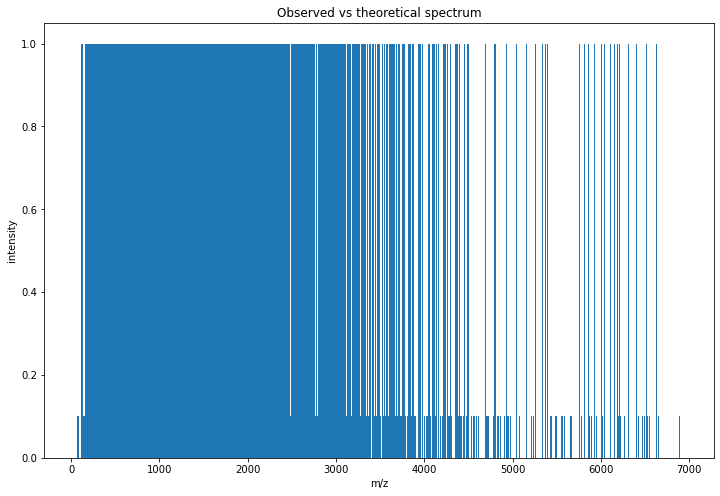

In [46]:
import numpy as np
from matplotlib import pyplot as plt
def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
    obs_int = [element / max(obs_int) for element in obs_int] 
    theo_int = [element * -1 for element in theo_int] 
    plt.figure(figsize=(12,8))
    plt.bar(obs_mz, obs_int, width = 3.0)
    plt.bar(theo_mz, theo_int, width = 3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')

obs_mz, obs_int = observed_spectrum.get_peaks()
print(min(obs_mz)) 
print(max(obs_mz)) 


theo_mz, theo_int = [], []
for mz, intensity in zip(*theo_spectrum.get_peaks()):
    if mz >= min(obs_mz) and mz <= max(obs_mz):
        theo_mz.append(mz)
        theo_int.append(intensity)

title = 'Observed vs theoretical spectrum'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)

In [47]:
alignment = []
spa = SpectrumAlignment()
p = spa.getParameters()
p.setValue("tolerance", 0.5)
p.setValue("is_relative_tolerance", "false")
spa.setParameters(p)
spa.getSpectrumAlignment(alignment, theo_spectrum, observed_spectrum)

In [48]:
print("Number of matched peaks: " + str(len(alignment)))
print("ion\ttheo. m/z\tobserved m/z")

for theo_idx, obs_idx in alignment:
    ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
    ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
    print(ion_name + "\t" + str(ion_charge) + "\t"
      + str(theo_spectrum[theo_idx].getMZ())
      + "\t" + str(observed_spectrum[obs_idx].getMZ()))

Number of matched peaks: 0
ion	theo. m/z	observed m/z


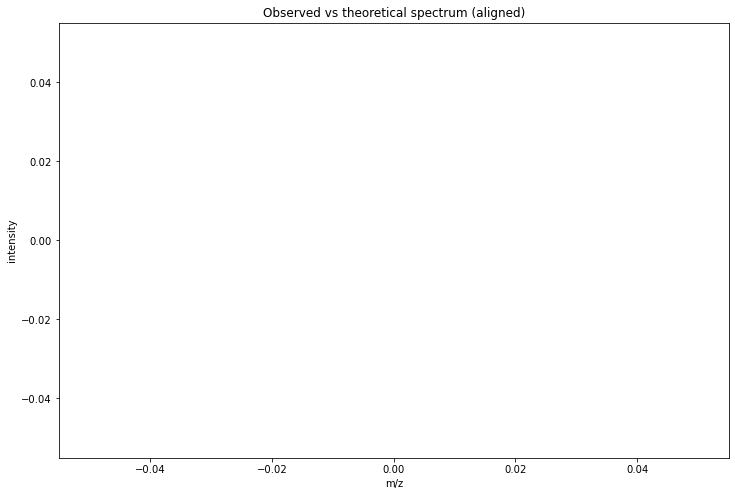

In [49]:
theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
for theo_idx, obs_idx in alignment:
    theo_mz.append(theo_spectrum[theo_idx].getMZ())
    theo_int.append(theo_spectrum[theo_idx].getIntensity())
    obs_mz.append(observed_spectrum[obs_idx].getMZ())
    obs_int.append(observed_spectrum[obs_idx].getIntensity())

title = 'Observed vs theoretical spectrum (aligned)'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)

In [11]:
from pyopenms import *
import matplotlib.pyplot as plt

In [12]:
exp = MSExperiment()
MzMLFile().load("D:\\fourth year projects\\Fusion_180220_40.mzML", exp)

In [13]:
def plotSpectrun(index):
    fig = plt.subplots(figsize =(10, 7))
    spec=exp[index]
    mz, intensity = spec.get_peaks()
    
    p1 = plt.bar(mz, intensity)
    plt.ylim([0, max(intensity)])
    plt.xlim([100, 800])
    
    plt.title("MS Level: " + str(spec.getMSLevel()))
    plt.ylabel('Intensity')
    plt.xlabel('m/z')
    plt.show()

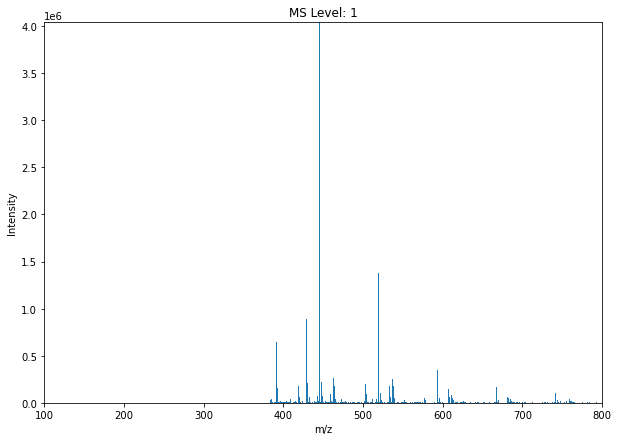

In [14]:
plotSpectrun(1000)

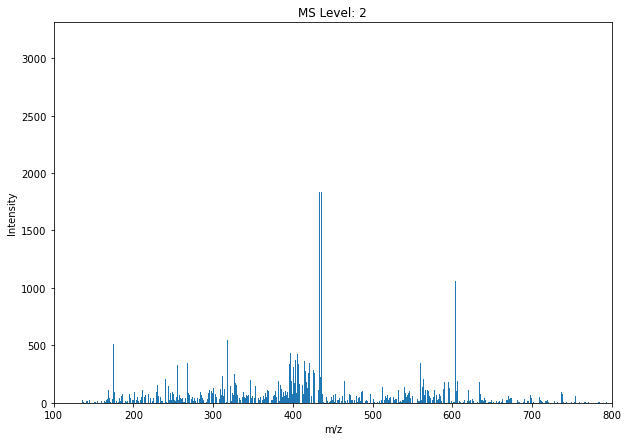

In [15]:
plotSpectrun(10010)